# K-Means & Expectation-Maximization (EM) Algorithm

_Developing a program to cluster a set of data stored in .csv file by applying k-Means and EM Algorithm, and then comparing the results of these two algorithms._

In [1]:
# Imports required packages

import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data Set
_This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 array. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width._

In [2]:
iris = load_iris()

In [3]:
# Checks the keys associated with dataset object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# Checks for the features and their location in the array
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Checks the shape of the data
print(iris.data.shape)

(150, 4)


In [6]:
# Prints the target classes
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Modeling

### Modeling with K-Means Clustering

In [7]:
# Initializes K-Means clustering algorithm
kmeans = KMeans(n_clusters = len(iris.target_names), random_state = 42)

# Fits the model
kmeans.fit(iris.data)

/home/pradip/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

### Modeling with EM Algorithm

In [8]:
# Initializes K-Means clustering algorithm
gm = GaussianMixture(n_components = len(iris.target_names), random_state = 42)

# Fits the model
gm.fit(iris.data)

# Performs predictions
gm_predictions = gm.predict(iris.data)

## Analyzing Model Performance

### Visual Comparison

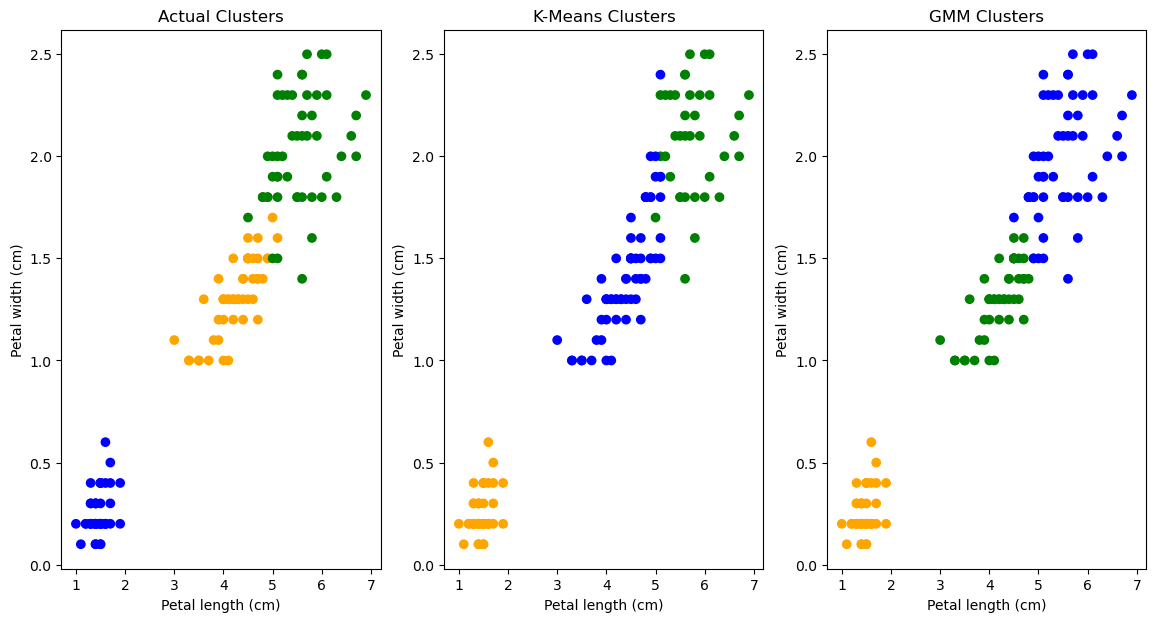

In [9]:
# Visual comparison against the actual clusters and the clusters predicted by the K-Means
# and Gaussian Mixture model. Two major featues "petal length" and "petal width" are being
# used to plot the dimensins

colormap = np.array(['blue', 'orange', 'green'])

plt.figure(figsize=(14,7))

# Plots the actual cluster
plt.subplot(1, 3, 1)
plt.scatter(iris.data[:,2], iris.data[:,3], c = colormap[iris.target])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Actual Clusters")

# Plots the clusters predicted by K-Means
plt.subplot(1, 3, 2)
plt.scatter(iris.data[:,2], iris.data[:,3], c = colormap[kmeans.labels_])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("K-Means Clusters")

# Plots the clusters predicted by Gaussian Mixture (GM)
plt.subplot(1, 3, 3)
plt.scatter(iris.data[:,2], iris.data[:,3], c = colormap[gm_predictions])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("GMM Clusters")

plt.show()